# Email Spam Classification

In this notebook, we will:
1. Load and preprocess the dataset.
2. Transform the text data using TF-IDF vectorization.
3. Train and evaluate different machine learning models (Naive Bayes, SVM, and Neural Network).
4. Visualize the results.

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


## Load and Preprocess the Dataset

In [37]:
# Load the dataset
data = pd.read_csv('combined_data.csv')
data.head()

# label_counts = data['label'].value_counts()
# print(f"Number of rows with label 0: {label_counts[0]}")
# print(f"Number of rows with label 1: {label_counts[1]}")

Number of rows with label 0: 39538
Number of rows with label 1: 43910


## Vectorize


## Split the Data

In [26]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)

## Transform the Text Data

In [27]:
# Transform the text data to TF-IDF features
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

## Train and Evaluate Models

In [28]:
# Function to train and evaluate a model
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

In [29]:
# Initialize models
nb_model = MultinomialNB()
svm_model = SVC()
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300)

# Train and evaluate Naive Bayes model
nb_metrics = train_and_evaluate_model(nb_model, X_train_tfidf, X_test_tfidf, y_train, y_test)
print(f"Naive Bayes - Accuracy: {nb_metrics[0]}, Precision: {nb_metrics[1]}, Recall: {nb_metrics[2]}, F1: {nb_metrics[3]}")
# 
# # Train and evaluate SVM model
# svm_metrics = train_and_evaluate_model(svm_model, X_train_tfidf, X_test_tfidf, y_train, y_test)
# print(f"SVM - Accuracy: {svm_metrics[0]}, Precision: {svm_metrics[1]}, Recall: {svm_metrics[2]}, F1: {svm_metrics[3]}")
# 
# # Train and evaluate Neural Network model
# nn_metrics = train_and_evaluate_model(nn_model, X_train_tfidf, X_test_tfidf, y_train, y_test)
# print(f"Neural Network - Accuracy: {nn_metrics[0]}, Precision: {nn_metrics[1]}, Recall: {nn_metrics[2]}, F1: {nn_metrics[3]}")

Naive Bayes - Accuracy: 0.9772318753744758, Precision: 0.9884480746791132, Recall: 0.9678930530164533, F1: 0.9780625793788246


## Visualize the Results

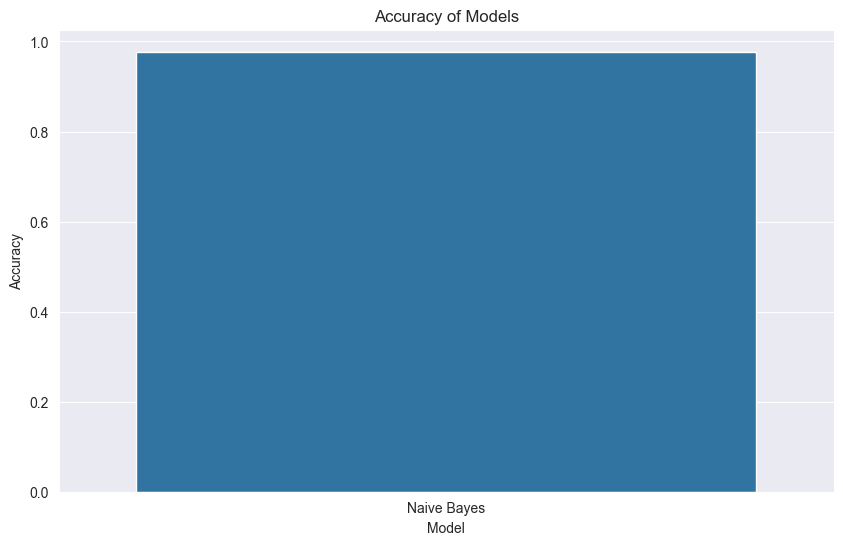

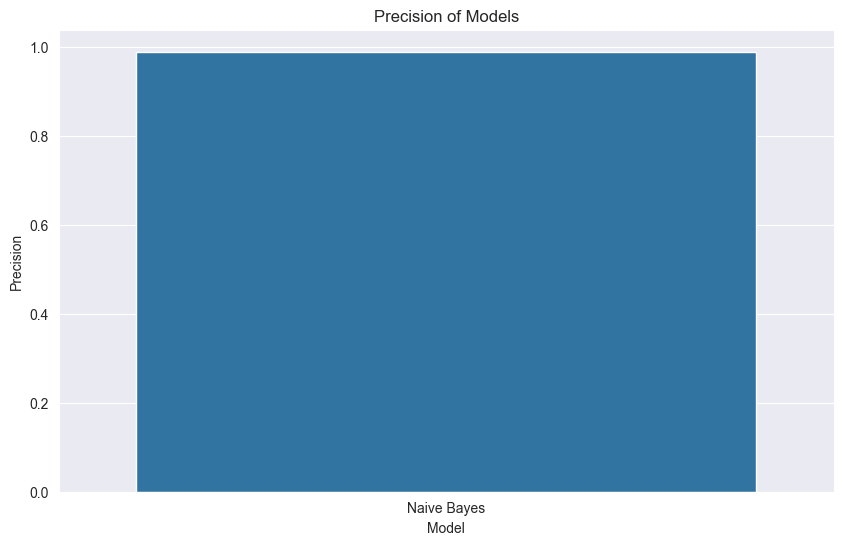

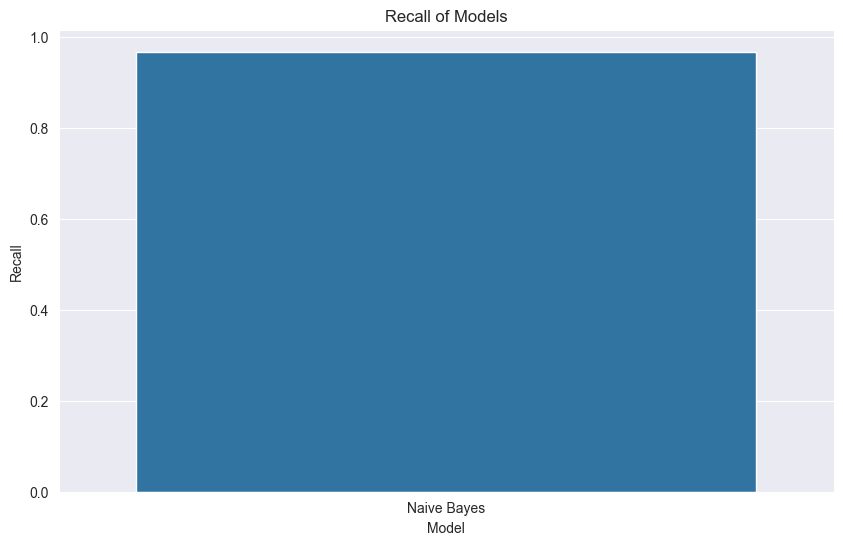

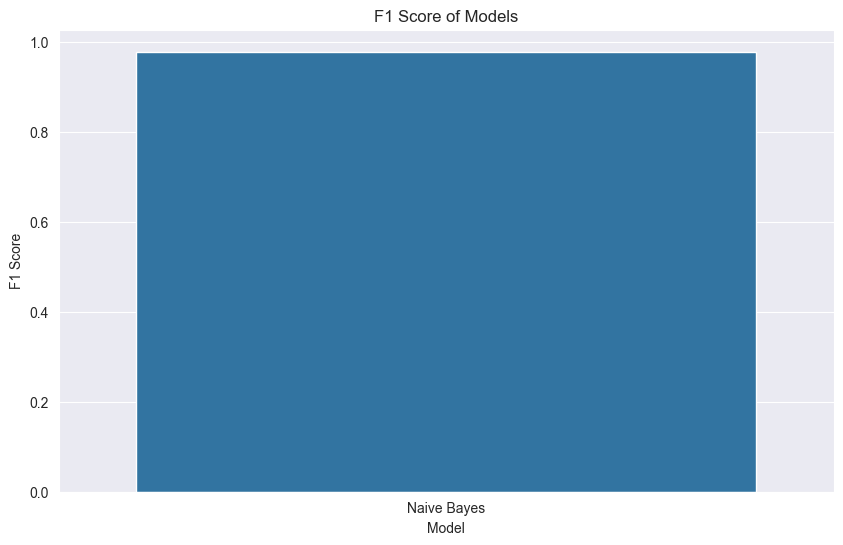

In [30]:
# # Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Model': ['Naive Bayes'],
    'Accuracy': [nb_metrics[0]],
    'Precision': [nb_metrics[1]],
    'Recall': [nb_metrics[2]],
    'F1 Score': [nb_metrics[3]]
})
# metrics_df = pd.DataFrame({
#     'Model': ['Naive Bayes', 'SVM', 'Neural Network'],
#     'Accuracy': [nb_metrics[0], svm_metrics[0], nn_metrics[0]],
#     'Precision': [nb_metrics[1], svm_metrics[1], nn_metrics[1]],
#     'Recall': [nb_metrics[2], svm_metrics[2], nn_metrics[2]],
#     'F1 Score': [nb_metrics[3], svm_metrics[3], nn_metrics[3]]
# })
# 
# Plot the metrics
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=metrics_df)
plt.title('Accuracy of Models')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Precision', data=metrics_df)
plt.title('Precision of Models')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Recall', data=metrics_df)
plt.title('Recall of Models')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='F1 Score', data=metrics_df)
plt.title('F1 Score of Models')
plt.show()